모델들의 내부를 살펴보며 작동 원리를 알아보겠다. 이를 통해 적절한 모델, 올바른 훈련 알고리즘, 좋은 하이퍼파라미터를 찾을 수 있게 될 것이다.

Setup

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

선형 회귀

선형 회귀는 입력 특성의 가중치 합과 편향을 더해 예측을 만든다. 회귀에 사용되는 성능 측정 지표는 RMSE, MSE이다(비용 함수라 부른다). 이것을 최소화하는 가중치와 편향값(쎄타)을 찾아야 한다.

비용 함수를 최소화하는 쎄타를 찾기 위한 해석적인 방법은 정규방정식이다. 비용 함수를 최소화하는 쎄타값을 얻을 수 있는 공식이다. 이 공식을 테스트하기 위해 선형처럼 보이는 데이터를 생성해보자.

In [3]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

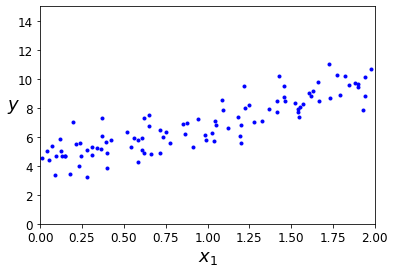

In [4]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

이제 쎄타 햇(최적의 쎄타값)을 계산해보자.

In [5]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [6]:
theta_best

array([[4.21509616],
       [2.77011339]])

우리가 변수를 생성한 코드를 보면 4, 3이 나오면 좋았지만 잡음때문에 좀 차이가 있다보다. 어쨋든 위 값을 사용해 예측해보자.

In [7]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]  # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.21509616],
       [9.75532293]])

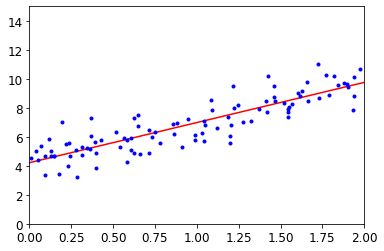

In [8]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()